In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=0.3)

In [5]:
X

array([[-0.30537224, -0.04322762],
       [-0.93108253, -0.61554676],
       [-0.26979124, -0.11881784],
       ...,
       [ 0.74287364,  0.00767603],
       [-0.90713063,  0.02498074],
       [-0.23846582, -0.66242615]])

In [7]:
y

array([-2.21166407e+01, -9.35386260e+01, -2.43099508e+01,  1.66573083e+01,
        6.32171588e+01, -4.67988078e+01,  2.25385077e+02, -9.82924274e+00,
        1.94200618e+01,  8.81113363e+00, -1.01462487e+02,  5.04194729e+01,
       -4.90924274e+01, -4.94850107e+01, -1.55672521e+02,  1.66789533e+01,
        1.05926042e+01,  3.09900209e+01, -7.02091197e+01,  1.90354049e+01,
        8.01822368e+01, -4.06998743e+01, -3.49047419e+01, -1.21884694e+01,
        2.39449369e+01, -7.12572201e+01,  9.71099324e+01,  6.63515974e+01,
       -8.12837932e+01,  8.22661727e+01, -1.25067611e+02,  6.92850081e+01,
       -1.63381468e+02, -2.52688830e+01, -6.22084414e+01, -7.81341467e+01,
        2.09804938e+02, -7.20921700e+01, -1.48731245e+02, -7.65392856e+01,
       -2.99596301e+01,  8.09703415e+00,  1.47935030e+02, -1.41207207e+01,
        5.78606612e+01, -1.15698923e+02, -8.38746733e+01,  1.07229494e+02,
       -1.42843597e+02, -1.68816846e+02,  7.92613943e+01,  6.24273105e+01,
        1.15627992e+02,  

<Axes: xlabel='0', ylabel='1'>

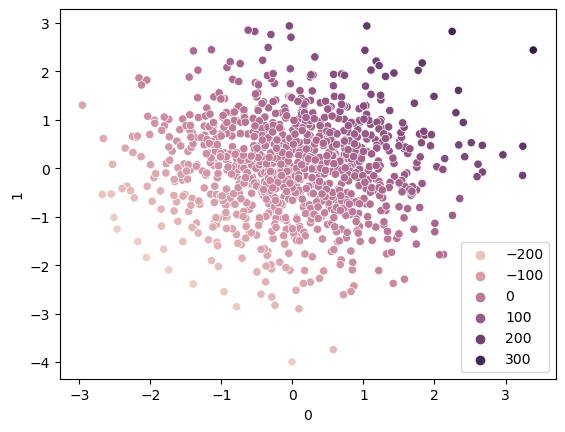

In [9]:
sns.scatterplot(x = pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue = y)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [13]:
from sklearn.svm import SVR
svr = SVR(kernel = "linear")

In [15]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [17]:
y_pred = svr.predict(X_test)

In [19]:
y_pred

array([  84.59163074,  -35.14291468,   11.36899149,  -27.40552285,
         54.08086566,  237.80017846,  125.78491814,    3.80957865,
        133.77420287, -169.16375646,   53.79118907,   64.4322607 ,
        -86.39268026,   80.66615745,   12.75586719,  189.40476954,
        -42.90262623,  225.68165708,  -20.68917304,   16.65635042,
        149.68026983,   82.05037619, -208.82677939,  -32.9882362 ,
         -8.64937123,  -45.23378795, -223.56501684,  -22.09604412,
         73.52660331, -179.11179835,   70.64174649,   61.01485048,
        -67.29817283, -158.21455659,  134.02072643,  -66.11148785,
         -3.34802101,   12.98285127,  189.93490536,  -52.62247006,
        -99.75980148,   32.09657318,  352.32392511,  -91.1891872 ,
        -33.24408599,  -71.6902512 , -103.14115382,    7.85711586,
         20.96521432,   41.58039945, -130.15886061,  -61.94396921,
        -43.4811927 ,  -78.39437707,  -36.29378349,   29.27959515,
        -54.59175996,    6.78202511, -107.83715409,  -74.27222

In [21]:
from sklearn.metrics import r2_score

In [23]:
r2_score(y_test,y_pred)

0.999987255650719

In [25]:
from sklearn.model_selection import GridSearchCV
params = {'C': [1, 2, 3, 4, 10, 50, 100],
         'gamma': [0.1, 0.2, 0.001],
         'kernel': ['linear'],
         'epsilon': [0.1, 0.001, 0.2, 0.3]}

In [27]:
grid = GridSearchCV(SVR(), param_grid=params, cv = 5, verbose = 4)

In [29]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.001, kern

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 4, 10, 50, 100],
                         'epsilon': [0.1, 0.001, 0.2, 0.3],
                         'gamma': [0.1, 0.2, 0.001], 'kernel': ['linear']},
             verbose=4)

In [31]:
grid.best_score_

0.9999855380597392